In [3]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#Reading data from csv file
df = pd.read_csv("breast-cancer.csv")

NameError: name 'pd' is not defined

In [3]:
#to display all columns
pd.set_option('display.max_columns', 500)
df.head(20)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0     842302         M        17.99         10.38          122.80     1001.0   
1     842517         M        20.57         17.77          132.90     1326.0   
2   84300903         M        19.69         21.25          130.00     1203.0   
3   84348301         M        11.42         20.38           77.58      386.1   
4   84358402         M        20.29         14.34          135.10     1297.0   
5     843786         M        12.45         15.70           82.57      477.1   
6     844359         M        18.25         19.98          119.60     1040.0   
7   84458202         M        13.71         20.83           90.20      577.9   
8     844981         M        13.00         21.82           87.50      519.8   
9   84501001         M        12.46         24.04           83.97      475.9   
10    845636         M        16.02         23.24          102.70      797.8   
11  84610002         M        15.78         17.89          103.60      781.0   
12    846226         M        19.17         24.80          132.40     1123.0   
13    846381         M        15.85         23.95          103.70      782.7   
14  84667401         M        13.73         22.61           93.60      578.3   
15  84799002         M        14.54         27.54           96.73      658.8   
16    848406         M        14.68         20.13           94.74      684.5   
17  84862001         M        16.13         20.68          108.10      798.8   
18    849014         M        19.81         22.15          130.00     1260.0   
19   8510426         B        13.54         14.36           87.46      566.3   

    smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           0.11840           0.27760         0.30010              0.14710   
1           0.08474           0.07864         0.08690              0.07017   
2           0.10960           0.15990         0.19740              0.12790   
3           0.14250           0.28390         0.24140              0.10520   
4           0.10030           0.13280         0.19800              0.10430   
5           0.12780           0.17000         0.15780              0.08089   
6           0.09463           0.10900         0.11270              0.07400   
7           0.11890           0.16450         0.09366              0.05985   
8           0.12730           0.19320         0.18590              0.09353   
9           0.11860           0.23960         0.22730              0.08543   
10          0.08206           0.06669         0.03299              0.03323   
11          0.09710           0.12920         0.09954              0.06606   
12          0.09740           0.24580         0.20650              0.11180   
13          0.08401           0.10020         0.09938              0.05364   
14          0.11310           0.22930         0.21280              0.08025   
15          0.11390           0.15950         0.16390              0.07364   
16          0.09867           0.07200         0.07395              0.05259   
17          0.11700           0.20220         0.17220              0.10280   
18          0.09831           0.10270         0.14790              0.09498   
19          0.09779           0.08129         0.06664              0.04781   

    symmetry_mean  fractal_dimension_mean  radius_se  texture_se  \
0          0.2419                 0.07871     1.0950      0.9053   
1          0.1812                 0.05667     0.5435      0.7339   
2          0.2069                 0.05999     0.7456      0.7869   
3          0.2597                 0.09744     0.4956      1.1560   
4          0.1809                 0.05883     0.7572      0.7813   
5          0.2087                 0.07613     0.3345      0.8902   
6          0.1794                 0.05742     0.4467      0.7732   
7          0.2196                 0.07451     0.5835      1.3770   
8          0.2350                 0.07389     0.3063      1.0020   
9         

In [ ]:
#To display info about datatypes and null values
df.info()

In [ ]:
#dropping the ID column
df.drop("id",axis=1,inplace = True)

In [5]:
#Replacing Char with int values
df['diagnosis'].replace(["M","B"],[1,0],inplace=True)
# M =>1
# B =>0

In [6]:
df.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean   radius_se  texture_se  \
count     569.000000              569.000000  569.000000  569.000000   
mean        0.181162                0.062798    0.405172    1.216853   
std         0.027414                0.007060    0.277313    0.551648   
min         0.106000                0.049960    0.111500    0.360200   
25%         0.161900                0.057700    0.232400    0.833900   
50%         0.179200                0.061540    0.324200    1.108000   
75%         0.195700                0.066120    0.478900    1.474000   
max         0.304000                0.097440    2.873000    4.885000   

       perimeter_se     area_se  smoothness_se  compactness_se  concavity_se  \
count    569.000000  569.000000     569.000000      569.000000    569.000000   
mean       2.866059   40.337079       0.007041        0.025478      0.031894   
std        2.021855   45.491006       0.003003        0.017908      0.030186   
min        0.757000    6.802000       0.001713        0.002252      0.000000   
25%        1.606000   17.850000       0.005169        0.013080      0.015090   
50%        2.287000   24.530000       0.006380        0.020450      0.025890   
75%        3.357000   45.190000       0.008146        0.032450      0.042050   
max       21.980000  542.200000       0.031130        0.135400      0.396000   

       concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
count         569.000000   569.000000            569.000000    569.000000   
mean            0.011796     0.020542              0.003795     16.269190   
std             0.006170     0.008266              0.002646      4.833242   
min             0.000000     0.007882              0.000895      7.930000   
25%             0.007638     0.015160              0.002248     13.010000   
50%             0.010930     0.018730              0.003187     14.970000   
75%             0.014710     0.023480              0.004558     18.790000   
max             0.052790     0.078950              0.029840     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.72

In [7]:
# Getting mean columns with diagnosis
m_col = ['diagnosis','radius_mean', 'texture_mean', 'perimeter_mean',
        'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
        'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# Getting Se Columns with diagnosis
s_col = ['diagnosis','radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
        'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
        'fractal_dimension_se']

# Getting Worst column with diagnosis
w_col = ['diagnosis','radius_worst', 'texture_worst',
        'perimeter_worst', 'area_worst', 'smoothness_worst',
        'compactness_worst', 'concavity_worst', 'concave points_worst',
        'symmetry_worst', 'fractal_dimension_worst']

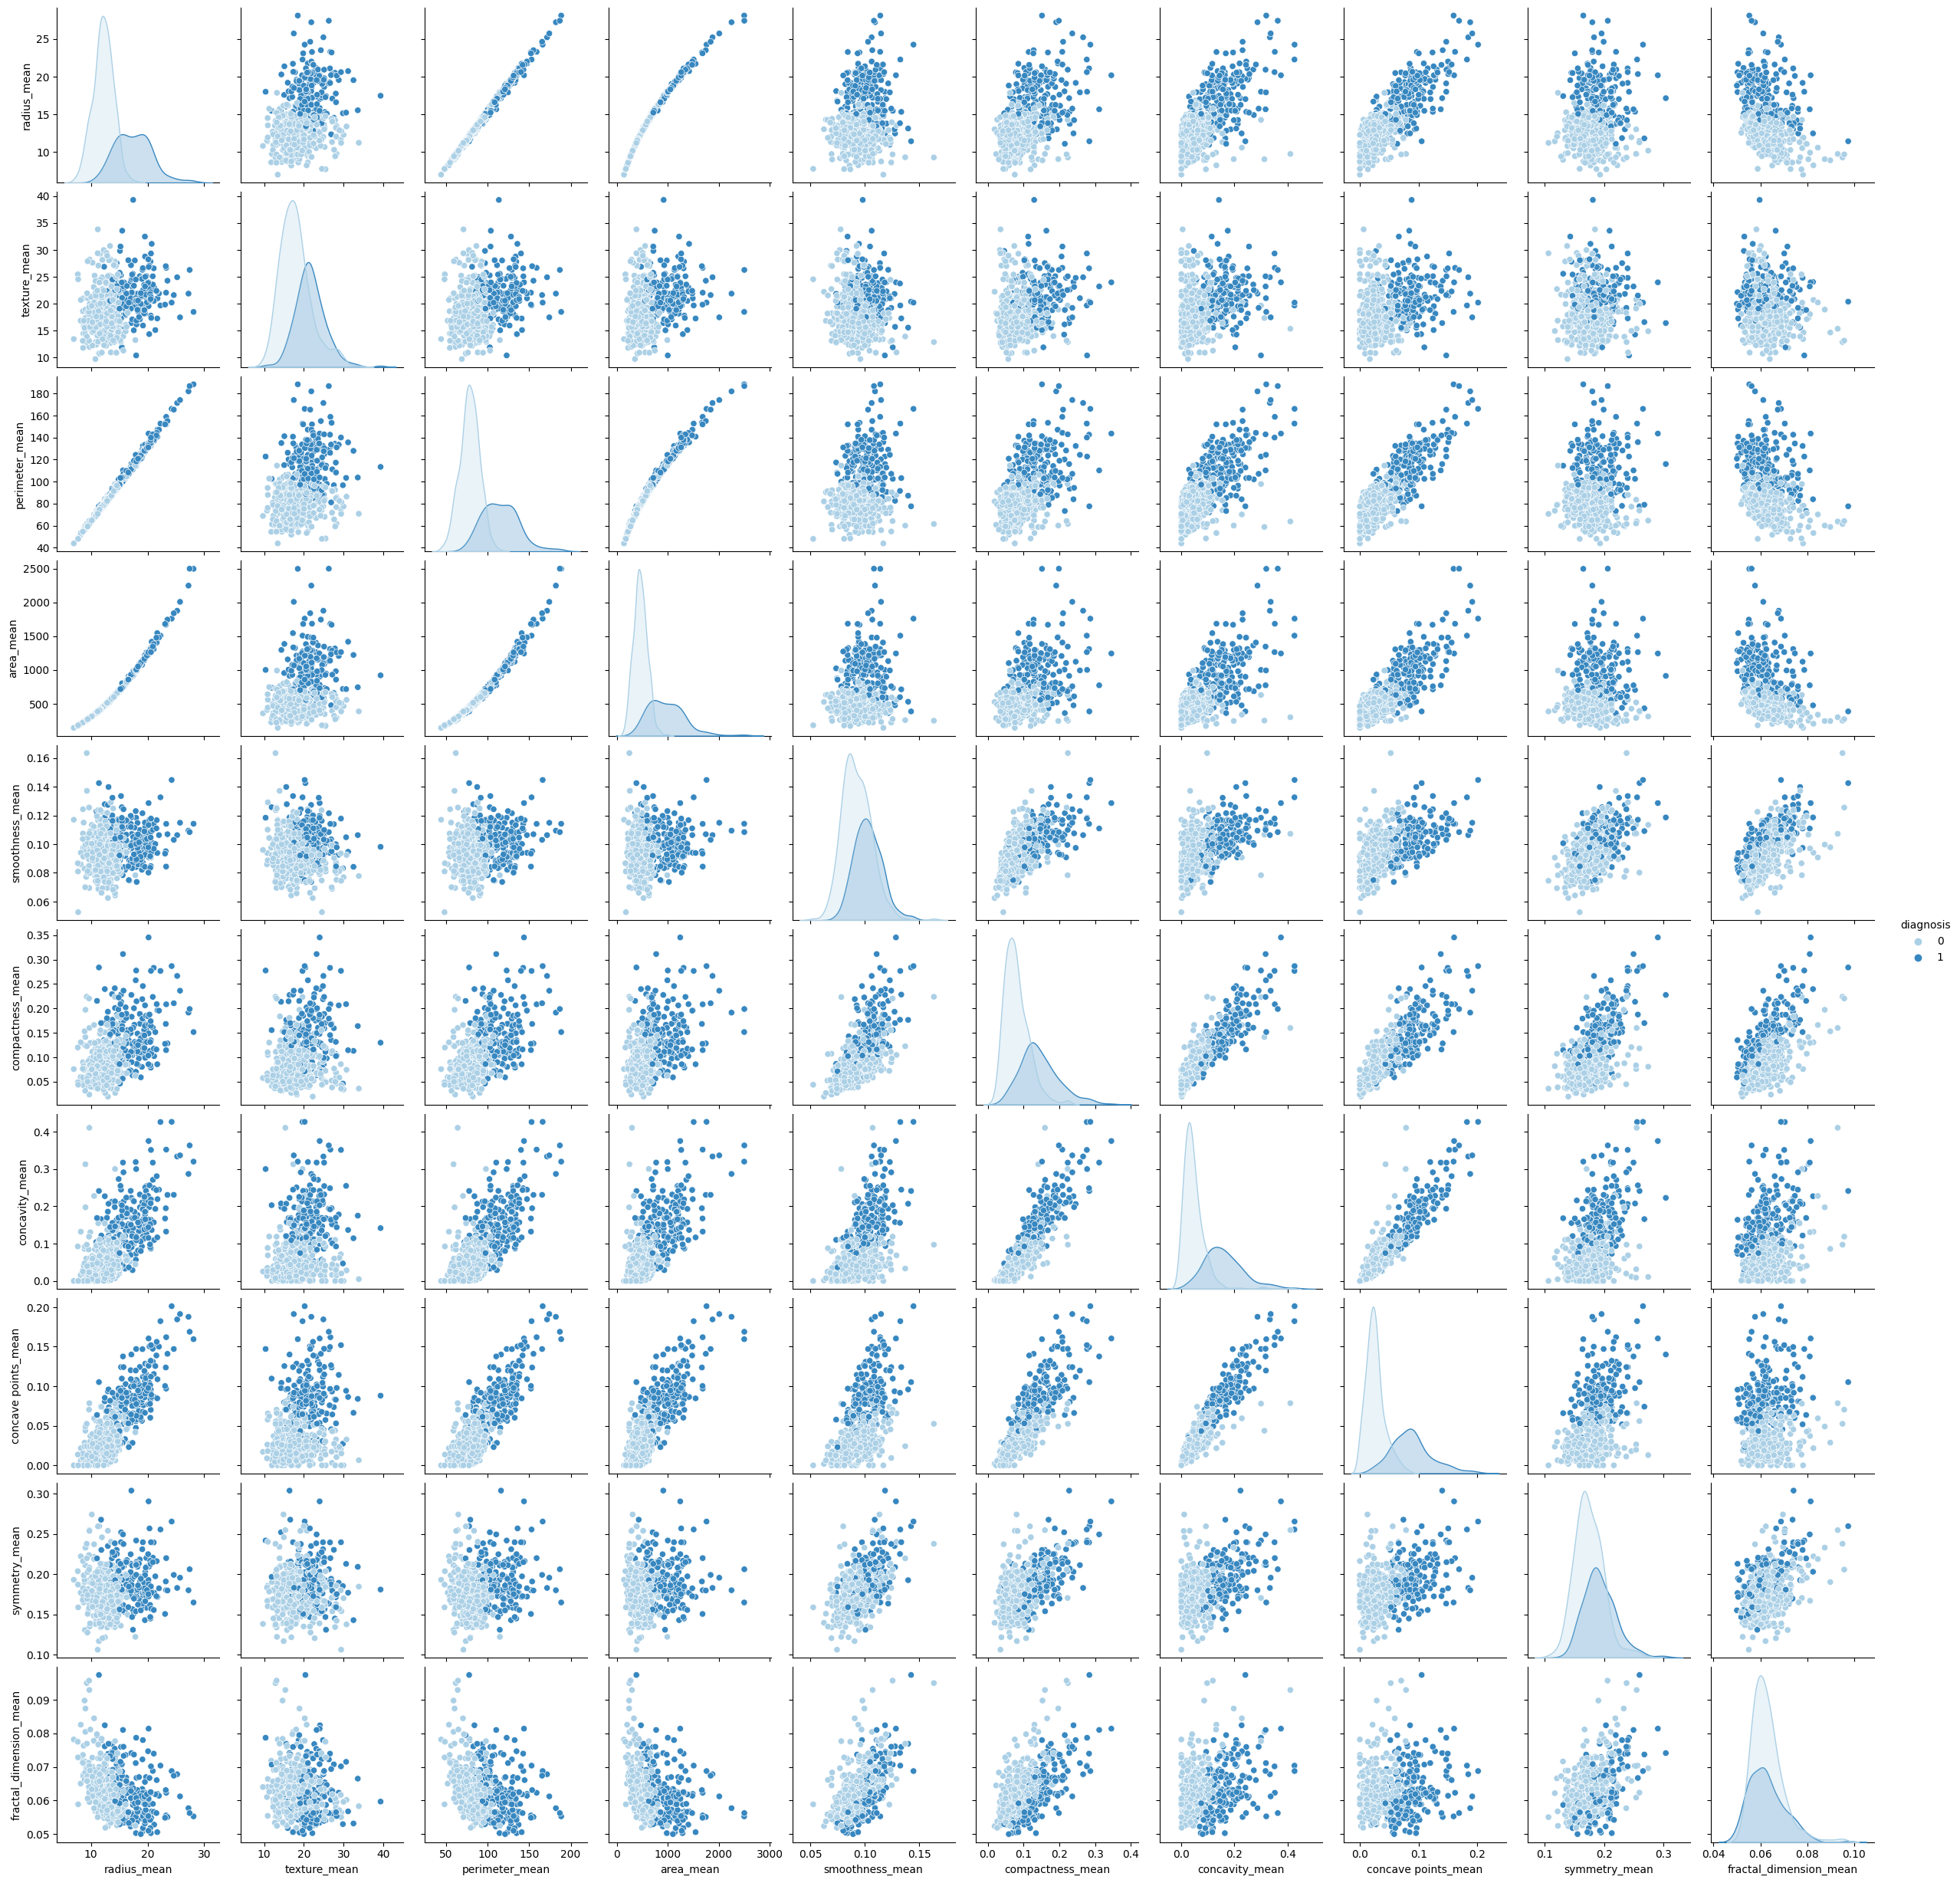

In [8]:
#mean
sns.pairplot(df[m_col],hue = 'diagnosis', palette='Blues')

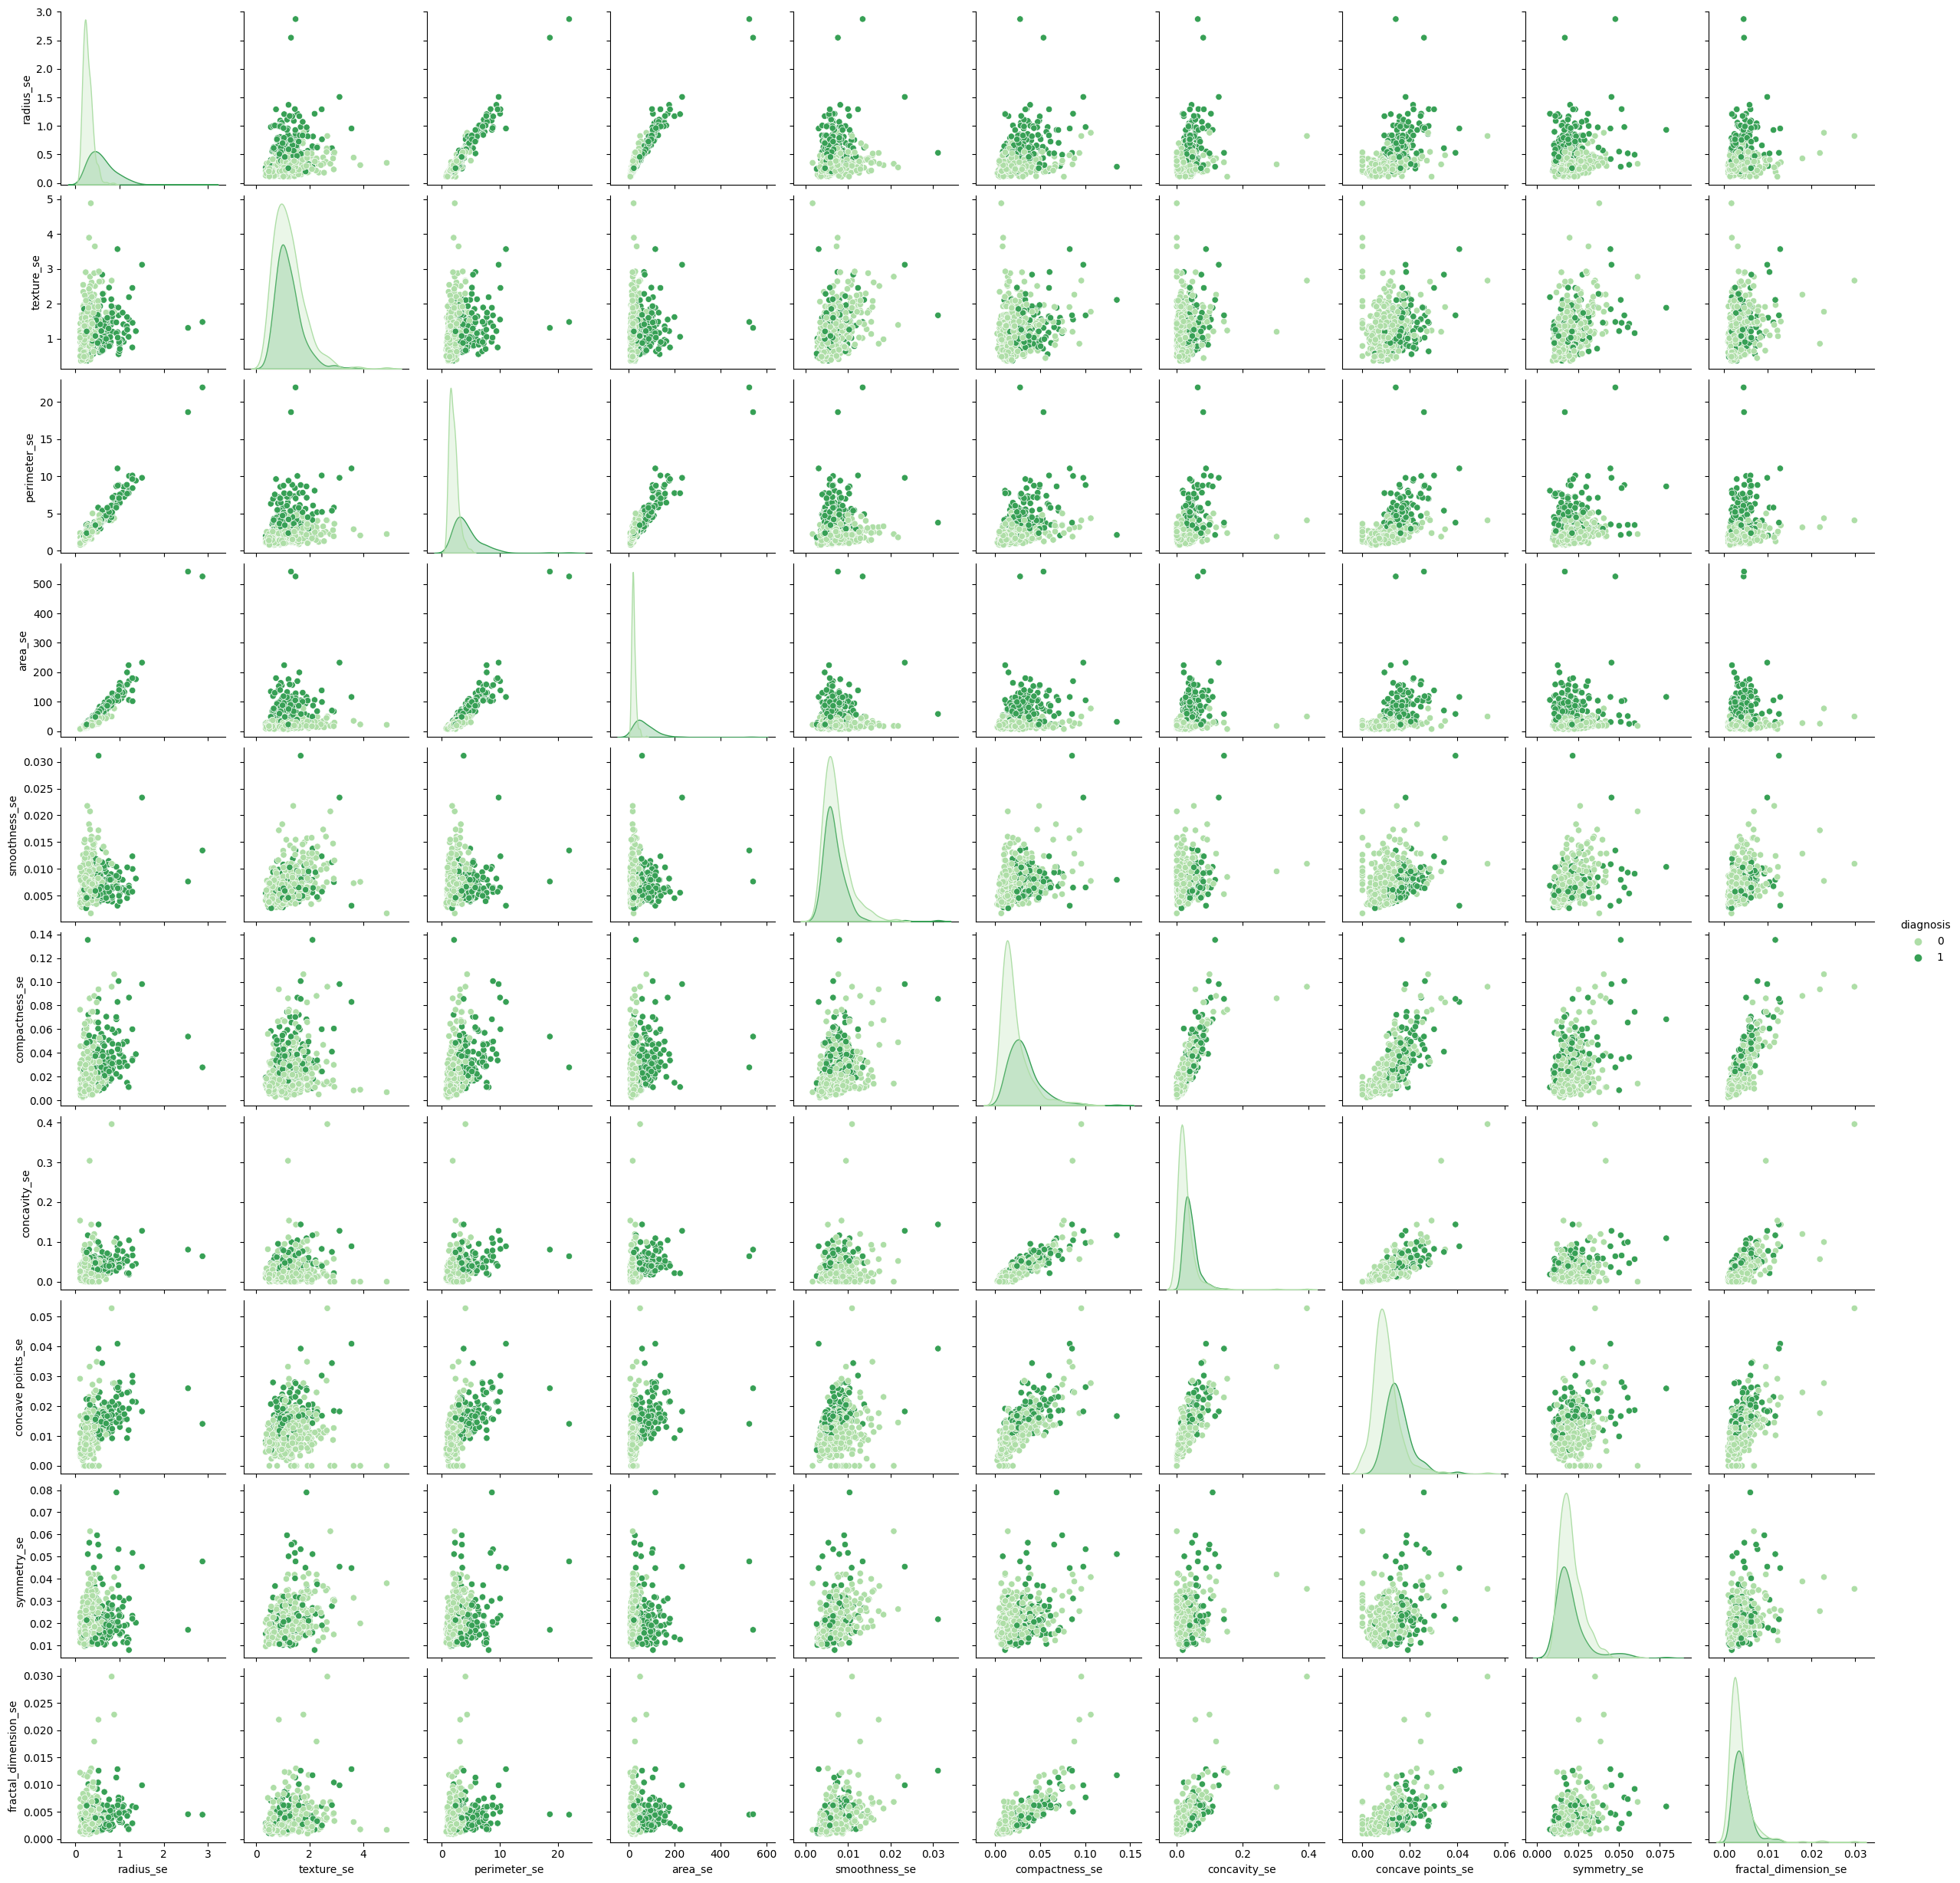

In [9]:
#se
sns.pairplot(df[s_col],hue = 'diagnosis', palette='Greens')

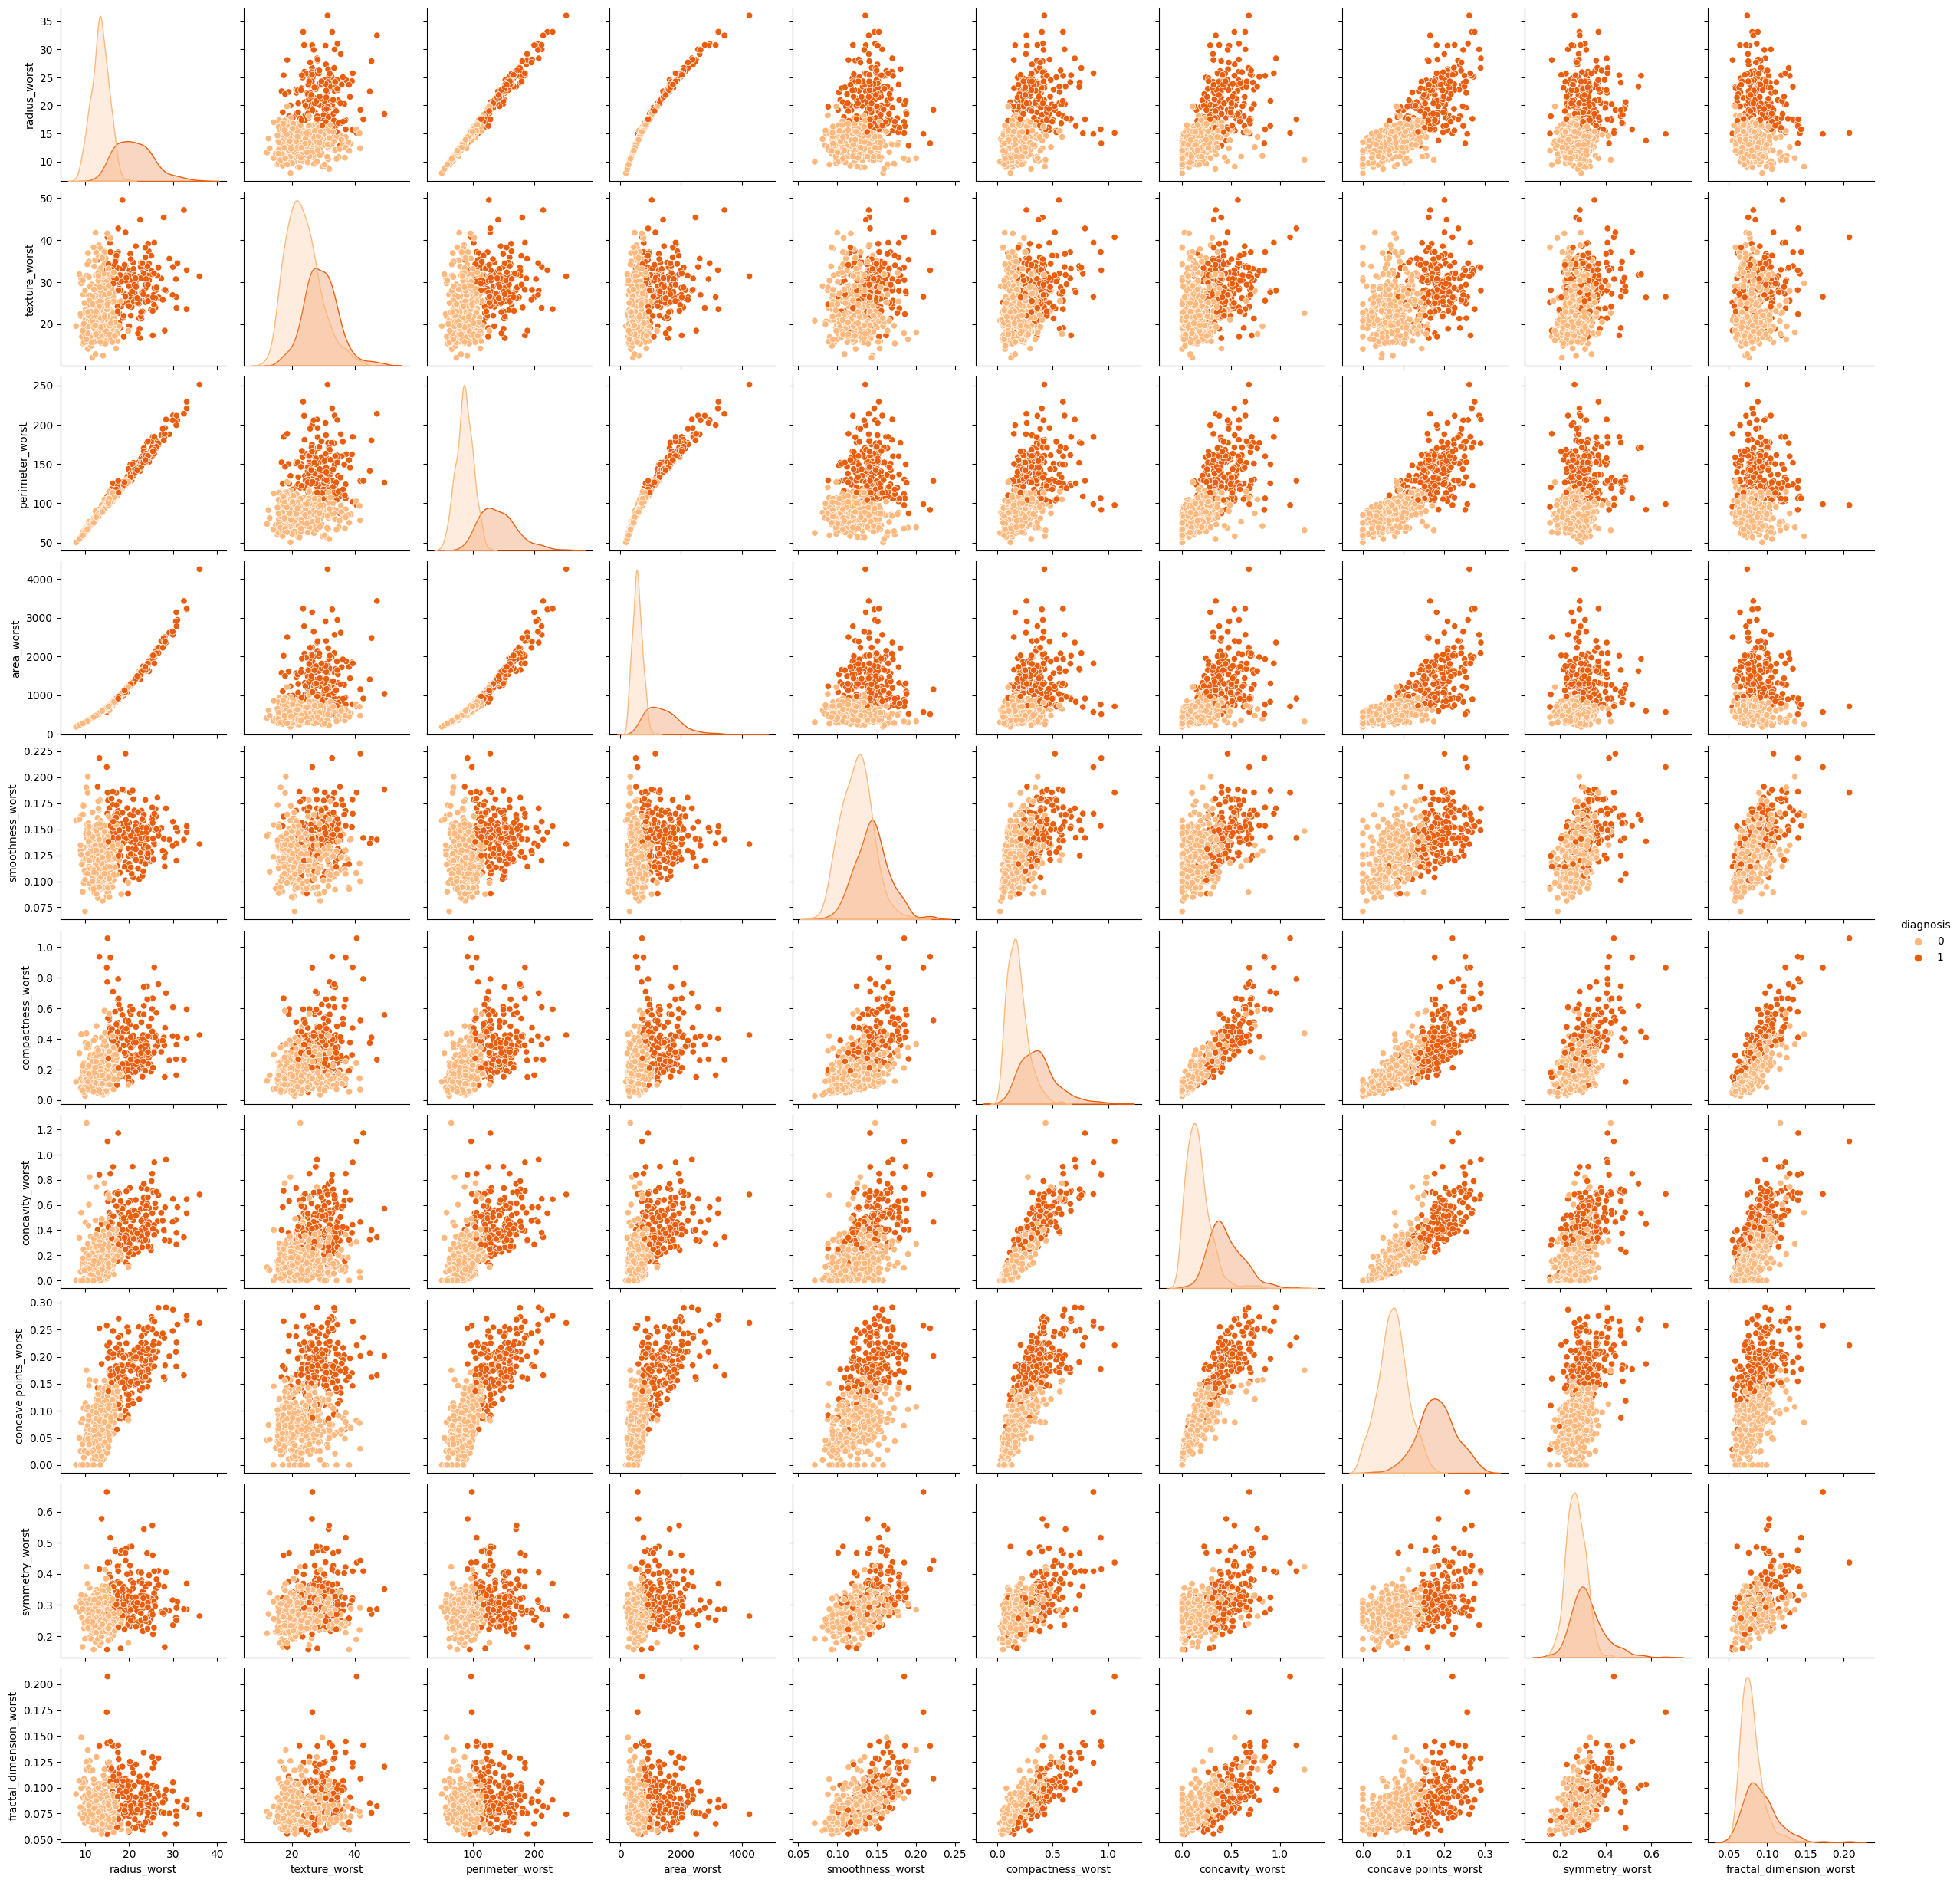

In [10]:
#worst
sns.pairplot(df[w_col],hue = 'diagnosis', palette='Oranges')

In [11]:
#choosing features and target
X = df.drop("diagnosis",axis=1)
y = df['diagnosis']

In [12]:
#creating the logistic regression model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

#Scaling data => Standardization
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

#Logistic regression model
lr = LogisticRegression(random_state = 0)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test,y_pred)*100
cm = confusion_matrix(y_test, y_pred)
cm


array([[118,   3],
       [  1,  66]], dtype=int64)

In [13]:
cr=classification_report(y_test, y_pred)
print(cr)
# Model accuracy => 99.46%

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       121
           1       0.96      0.99      0.97        67

    accuracy                           0.98       188
   macro avg       0.97      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



In [14]:
#KNN
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#model=KNeighborsClassifier(n_neighbors=4)
#model.fit(X_train,y_train)
#y_preds=model.predict(X_test)
#print(f"Testing score = {accuracy_score(y_test,y_preds)*100}")
# Model accuracy => 96.27%

In [15]:
import joblib
joblib_file = "breast_cancer_project"
joblib.dump(lr,joblib_file)

scaler_file = "breast_cancer_scaler"
joblib.dump(ss,scaler_file)

loaded_model = joblib.load(open(joblib_file, 'rb'))

pred_y = loaded_model.predict(X_test)
result = np.round(accuracy_score(y_test,y_pred),3)
print(result*100)

97.89999999999999


In [16]:
import pickle
pickle_file = "breast_cancer_project_pickle.pkl"
pickle.dump(lr,open(pickle_file,'wb'))

loaded_model = pickle.load(open(pickle_file, 'rb'))

pred_y = loaded_model.predict(X_test)
result = np.round(accuracy_score(y_test,y_pred),3)
print(result*100)

97.89999999999999


The most prominent features in deciding the type of the Tumor were: Area, Radius and perimeter.

Removing outliers or replacing them with the median/mean values corrupted the actual data and accuracy of the model, so it was not the right thing to do.